# Lab 3, Section AD, Gautam Kovoor

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
from statsmodels.stats import weightstats as stests
from scipy.stats import poisson

## Problem 1

We begin by creating a random population of size 100,000 that follows a normal distribution of mean 12 and standard deviation 0.4.

In [20]:
#a)
mu, sigma = 12, 0.4
s = np.random.normal(mu, sigma, 100000)

Below is a histogram of all the random samples with probability as the y axis and the temperature reading as the x axis.

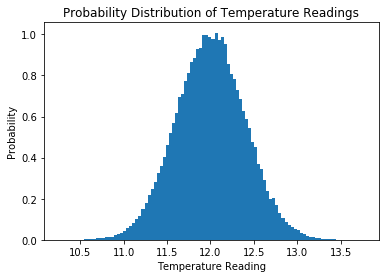

In [21]:
x = np.linspace(10, 14, 100)
y = scipy.stats.norm.pdf(x, mu, sigma)
plt.hist(s, 100, density=True)

plt.title('Probability Distribution of Temperature Readings')
plt.ylabel('Probability')
plt.xlabel('Temperature Reading')
plt.show()

After adding in the 'bad datapoints', we want to be able to visualize the bad data points in our distribution. To do this, we plot the log of the y axis against the readings, this allows us to see the bars representing the bad data.

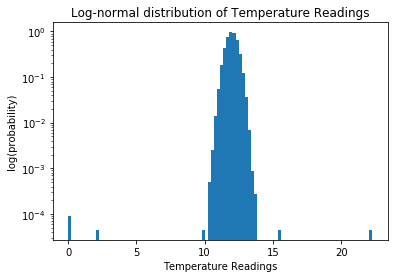

In [22]:
newData = np.append(s, [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
# Use the log scale so that you can see the outliers in the plot
plt.yscale("log")
plt.hist(newData, 100, density=True)

plt.title('Log-normal distribution of Temperature Readings')
plt.ylabel('log(probability)')
plt.xlabel('Temperature Readings')
plt.show()

## Statistical Question

If we assume the background of temperature readings to be Gaussian Distributed with a mean of around 12 Kelvin and a standard deviation of 0.4 Kelvin. Assuming we have a population of 100,000 events what is the probability of producing a reading that is $\geqslant 12.3$

Because we are trying to find the probability of the a reading greater than or equal to 12.3, we can follow the below steps:
- Find the pdf() of the background.
- Find the integral of the pdf.
- Subtract that integral from 1 since it is a greater than or equal to.
- The above operation will give you the probability.

We are simply trying to calculate the area underneath our distribution to find the probability of a reading greater than 12.3.

The math behind this question is given below.

$$1 - \int_{\infty}^{12.3} pdf(x) dx$$

In [23]:
prob = 1 - norm.cdf(12.3, 12, 0.4)
prob

0.2266273523768676

Therefore we can say that the probability of producing a reading greater than 12.3 is equal to approximately 0.227.

## Statistical Test

For this question we will need to test if the hypothesis is true or not, and the most basic way to do this is you to use a sample z-test.

Null hypothesis: The temperature reading is 12 Kelvin.
Alternate hypothesis: The temperature reading is greater than 12 Kelvin.

Let's take $H_{0}$ to be the null hypothesis.
Let's take $H_{a}$ to be the alternate hypothesis.

|     | $H_{0}$ True | $H_{a}$ False | 
| --- | --- | --- |
| Test says to accept $H_{0}$ | True | Type II error |
| Test says to reject $H_{0}$ | Type I error | Correct Rejection |

We use a z-test when our sample size is greater than 30, otherwise we use a t-test.

In [34]:
result = stests.ztest(newData, value=12)
probability = result[1]
print('The probability is: ', str(probability))

The probability is:  0.8186655467675459


The bad datapoints that we add to the data set can adjust the mean and standard deviation which are both parameters in the z test. The data you choose to get rid of can decide whether the null hypothesis is true or not. Adjusting the mean and standard deviation can determine whether we get a Type 1 or 2 error.

## Problem 2

Five sigma is a confidence interval that tells us the strength of our results. A five sigma confindence interval will tell us how likely the image is an asteroid.

What is the probability that the alignment of the stars in the subsequent images has a confidence/significance level of $5\sigma$? What is the minimum distance between the stars in subsequent images in arc seconds for this confidence level to be achieved? The distance between two points on a 2D plane is $\sqrt{(x^2 + y^2)}$.

Since this is a 2D gaussian distribution our probability distribution function will be:

$pdf(x) = \int_{\infty}^{\infty} \frac{e^{-({x-\mu}^2/(2\times\sigma)^2}}{\sigma \sqrt(2\times\pi)}$

This is a 2D gaussian distribution so it looks at the corellation between two random variables.

$PDF(x_1, x_2) = \frac{1}{2\times\sigma_1\times\sigma_2\times\sqrt{1-p^2}}\times exp(\frac{z}{2(1-p^2)})$

$z = \frac{(x_1 - \mu_1)^2}{(\sigma_1)^2} - \frac{2\times p(x_1 - \mu_1)(x_2 - \mu_2)}{\sigma_1\times\sigma_2)}$

p represents the correlation between the two variables $x_1 and x_2$

This was referenced from http://mathworld.wolfram.com/BivariateNormalDistribution.html

## Problem 3

We can use the Poisson Distribution to model the number of times the moon will block cosmic rays. The Poisson Distribution is a discrete distribution used to model how many times and event is likely to occur in a given time period.

- The mean number of events occuring in a minute is 1 cosmic ray.
- The number of minutes in 15 days is $15\times8\times60$ = 7,200 minutes.
- Our new mean is 7200 cosmic rays.

For our statistical question we can look at the probability of seeing 8000 cosmic rays per minute? with the mean number of cosmic rays per minute being 7,200 rays.

To calculate this we will use the Poisson Probability Mass Function to calculate the probability at 8000 rays.

In [41]:
mu = 7200
prob = poisson.pmf(8000, mu)
prob

1.0593063742890414e-21

Therefore the probability of obtaining exactly 8000 cosmic rays per minute is equal to $1.06 \times 10^-21$